In [24]:
import pandas as pd
import numpy as np

data = pd.read_csv('Dbig.txt', delimiter=' ', header=None)

np.random.seed(0)  
permutation = np.random.permutation(data.index)
train_indices = permutation[:8192]
test_indices = permutation[8192:]

train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

D32_indices = train_indices[:32]
D128_indices = train_indices[:128]
D512_indices = train_indices[:512]
D2048_indices = train_indices[:2048]
D8192_indices = train_indices[:8192]  

D32 = data.iloc[D32_indices]
D128 = data.iloc[D128_indices]
D512 = data.iloc[D512_indices]
D2048 = data.iloc[D2048_indices]
D8192 = data.iloc[D8192_indices]

dataset_dict = {
    "D32": (D32.iloc[:, :-1].values, D32.iloc[:, -1].values),
    "D128": (D128.iloc[:, :-1].values, D128.iloc[:, -1].values),
    "D512": (D512.iloc[:, :-1].values, D512.iloc[:, -1].values),
    "D2048": (D2048.iloc[:, :-1].values, D2048.iloc[:, -1].values),
    "D8192": (D8192.iloc[:, :-1].values, D8192.iloc[:, -1].values)
}

X32 = D32.iloc[:, :-1].values
y32 = D32.iloc[:, -1].values

X128 = D128.iloc[:, :-1].values
y128 = D128.iloc[:, -1].values

X512 = D512.iloc[:, :-1].values
y512 = D512.iloc[:, -1].values

X2048 = D2048.iloc[:, :-1].values
y2048 = D2048.iloc[:, -1].values

X8192 = D8192.iloc[:, :-1].values
y8192 = D8192.iloc[:, -1].values


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

results = {}  

for dataset_name, (X, y) in dataset_dict.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=None)
    
    classifier = DecisionTreeClassifier(random_state=0)
    
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    err_n = 1 - accuracy  
    
    n = classifier.tree_.node_count
    
    results[dataset_name] = (n, err_n)
    
for dataset_name, (n, err_n) in results.items():
    print(f"For {dataset_name}: n = {n}, err_n = {err_n:.2f}")


For D32: n = 13, err_n = 0.36
For D128: n = 15, err_n = 0.05
For D512: n = 55, err_n = 0.04
For D2048: n = 87, err_n = 0.04
For D8192: n = 205, err_n = 0.02


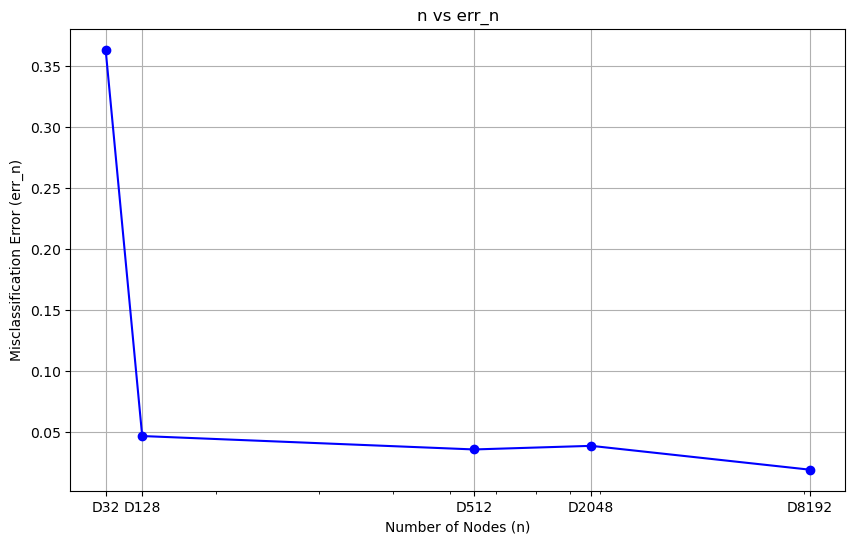

In [37]:
import matplotlib.pyplot as plt

datasets = list(results.keys())
n_values = [results[dataset][0] for dataset in datasets]
err_n_values = [results[dataset][1] for dataset in datasets]

# Plot n vs. err_n
plt.figure(figsize=(10, 6))
plt.semilogx(n_values, err_n_values, marker='o', linestyle='-', color='b')
plt.title('n vs err_n')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Misclassification Error (err_n)')
plt.xticks(n_values, labels=datasets)  
plt.savefig('n vs err_n')
plt.grid(True)
plt.show()
